# Лабораторная работа №4

ФИО:  **Чан Ван Минь**   
Группа: **БИВТ-20-6**  

Отправлять можно следующими способами (**обязательно указать свое ФИО и группу в каком-либо виде**):
1. Создать **приватный** репозиторий на github, добавить меня по нику (l3lush) в Collaborators (Settings -> Collaborators -> Add people)
2. Отправить заполненный ноутбук мне на почту avmysh@gmail.com, либо m1603956@edu.misis.ru
3. Отправить заполненный ноутбук мне в тг @l3lush. 

**Deadline**:
- hard -- **04.06.2023 23:59** (дедлайн теперь один)


**Что необходимо сделать** (можете вдохновляться ноутбуками для семинара, они должны помочь):
1. Загрузить датасет (вариант смотреть [здесь](https://docs.google.com/spreadsheets/d/1pFk1qZJtMrV8GWUmdSjV5Kz6JnFdBQDShErFZ337FDc/edit?usp=sharing))
2. Описать кратенько словами датасет, описать поставку задачи, что от чего отличаем, привести примеры картинок (картинки можно визуализировать после шага 3, когда у вас будет красивый датасет).
3. Оформить датасет в виде объекта класса Dataset из PyTorch (обязательно надо сделать препроцессинг данных: нормализовать данные, добавить аугментации к данным и пр.).
4. Оформить датасет из шага 3 в Dataloader.
5. Реализовать архитектуру собственной нейросети и натренировать ее на датасете (можно не обучать 1000 эпох, достаточно 10 эпох, но чтобы метрики начали улучшаться).
6. Обучить нейросеть, используя Transfer Learning. Модель можно выбрать на свой вкус (список всех моделей, доступных в torchvision есть [тут](https://pytorch.org/vision/stable/models.html)).
7. Посчитать метрики качества финальной модели, сделать выводы.

**Замечание**  
Если понимаете, что данные слишком много весят, или с датасетом что-то не так, можете брать любой другой.  

P.S. Чтобы не ждать века, тренируйте модели на Colab с использованием GPU (Runtime -> Change runtime type -> GPU)  
P.S.S. Сохраняйте вывод ячеек и пушьте вместе с ним, в противном случае я не смогу нормально проверить все работы, если буду запускать все ноутбуки и ждать обучение моделей

# Пример, как загружать данные

In [1]:
# in Colab
!pip install datasets  
# локально придется установить эту библиотеку через консоль

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 10.7 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset
dataset = load_dataset('beans')  # тут надо написать название вашего датасета

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1034 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/133 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/128 [00:00<?, ? examples/s]

Dataset beans downloaded and prepared to /root/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy



# **Описание :**

---


**Beans** — это набор изображений бобов, сделанных в поле с помощью камер смартфонов. Он состоит из 3 классов: 2 класса болезней(**angular_leaf_spot ; bean_rush**) и класса здоровых(**healthy**). Изображенные болезни включают угловую пятнистость листьев и бобовую ржавчину. Иллюстрации ниже.

---



In [4]:

class CustomImageDataset(Dataset):
   def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform
    
   def __getitem__(self, index):
        # Get the image and label from the dataset
        image = self.dataset[index]['image']
        label = self.dataset[index]['labels']
        
        # Apply transformations
        if self.transform:
            image = self.transform(image)
        return image, label
   def __len__(self):
        return len(self.dataset)

trainsform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

In [5]:
train = CustomImageDataset(dataset['train'], 
                           transform= trainsform)
test = CustomImageDataset(dataset['test'], 
                           transform=trainsform)
val  = CustomImageDataset(dataset['validation'], 
                           transform=trainsform)

In [7]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val, batch_size=4, shuffle=True)



---
# **Иллюстрации**


---



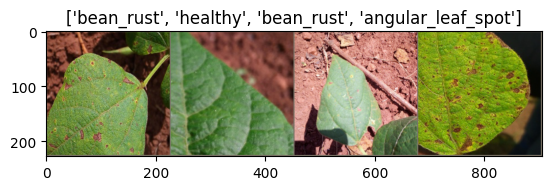

In [22]:
labels_map = {
  0:"angular_leaf_spot",
  1:"bean_rust",
  2:"healthy",
}
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

inputs, labels = next(iter(train_dataloader))
out = torchvision.utils.make_grid(inputs)
imshow(out,title =[labels_map[x.item()] for x in labels])

In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [24]:
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3*224*224, 1000),
            nn.ReLU(),
            nn.Linear(1000, 1000),
            nn.ReLU(),
            nn.Linear(1000, 500),
            nn.ReLU(),
            nn.Linear(500, 3),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [25]:
model = NeuralNetwork().to(device)
learning_rate = 1e-3
epochs = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X.to(device))
        loss = loss_fn(pred, y.to(device))

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.to(device))
            test_loss += loss_fn(pred, y.to(device)).item()
            _, predicted_labels = torch.max(pred, dim=1)
            correct += (predicted_labels == y.to(device)).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [26]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.115528  [    0/ 1034]
loss: 0.963550  [  400/ 1034]
loss: 0.811235  [  800/ 1034]
Test Error: 
 Accuracy: 58.6%, Avg loss: 0.878327 

Epoch 2
-------------------------------
loss: 0.861138  [    0/ 1034]
loss: 1.080669  [  400/ 1034]
loss: 0.309764  [  800/ 1034]
Test Error: 
 Accuracy: 62.5%, Avg loss: 0.848034 

Epoch 3
-------------------------------
loss: 0.829594  [    0/ 1034]
loss: 1.136493  [  400/ 1034]
loss: 0.614737  [  800/ 1034]
Test Error: 
 Accuracy: 64.8%, Avg loss: 0.789878 

Epoch 4
-------------------------------
loss: 0.849202  [    0/ 1034]
loss: 0.676224  [  400/ 1034]
loss: 0.432686  [  800/ 1034]
Test Error: 
 Accuracy: 65.6%, Avg loss: 0.823321 

Epoch 5
-------------------------------
loss: 0.649887  [    0/ 1034]
loss: 0.879739  [  400/ 1034]
loss: 0.840014  [  800/ 1034]
Test Error: 
 Accuracy: 62.5%, Avg loss: 0.850480 

Epoch 6
-------------------------------
loss: 1.621516  [    0/ 1034]
loss: 0.779948  [  4

In [32]:
dataset_sizes = {'train' : len(train), 'val': len(val)}
x = {'train':train_dataloader, 'val':val_dataloader}
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train() 
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in x[phase]:
              inputs = inputs.to(device)
              labels = labels.to(device)
              optimizer.zero_grad()

              with torch.set_grad_enabled(phase == 'train'):

                outputs = model(inputs)
                _, preds = torch.max(outputs.to(device), dim = 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                  loss.backward()
                  optimizer.step()

              running_loss += loss.item() * inputs.size(0)
              running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase] *100

            print('{} Loss: {:.4f} Acc: {:.4f}%'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}%'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

In [28]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(labels_map[preds[j].item()]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [30]:
model_conv = torchvision.models.resnet152(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 3)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=2, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:05<00:00, 46.7MB/s]


In [33]:
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.7220 Acc: 70.2128%
val Loss: 2.1960 Acc: 78.1955%

Epoch 1/9
----------
train Loss: 0.5467 Acc: 78.7234%
val Loss: 0.7798 Acc: 87.2180%

Epoch 2/9
----------
train Loss: 0.5512 Acc: 77.2727%
val Loss: 1.2481 Acc: 86.4662%

Epoch 3/9
----------
train Loss: 0.5178 Acc: 78.4333%
val Loss: 0.6156 Acc: 86.4662%

Epoch 4/9
----------
train Loss: 0.5464 Acc: 77.8530%
val Loss: 0.5112 Acc: 84.9624%

Epoch 5/9
----------
train Loss: 0.5260 Acc: 76.9826%
val Loss: 0.6429 Acc: 88.7218%

Epoch 6/9
----------
train Loss: 0.5211 Acc: 78.8201%
val Loss: 0.5353 Acc: 82.7068%

Epoch 7/9
----------
train Loss: 0.5355 Acc: 79.1103%
val Loss: 0.3499 Acc: 88.7218%

Epoch 8/9
----------
train Loss: 0.5254 Acc: 79.0135%
val Loss: 0.8295 Acc: 86.4662%

Epoch 9/9
----------
train Loss: 0.5158 Acc: 78.7234%
val Loss: 0.3763 Acc: 91.7293%

Training complete in 4m 23s
Best val Acc: 91.729323%


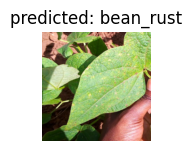

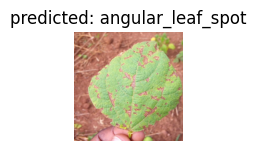

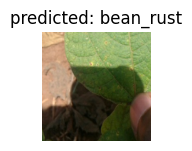

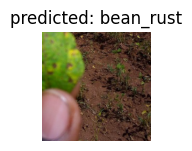

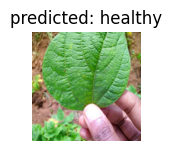

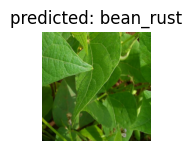

In [44]:
visualize_model(model)

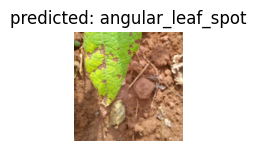

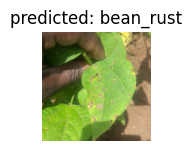

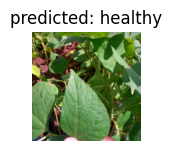

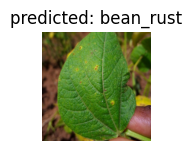

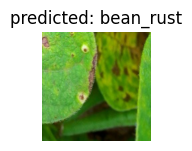

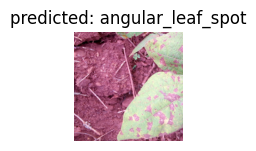

In [51]:
visualize_model(model_conv)



---

# **вывод:**
Модель трансферного обучения (**model_conv**) с максимальной точностью Acc: 91.73% имеет лучшее качество, чем модель (**model**), которую я создал сам (68%)

---

